Welcome!
What do you want to do? 
1-Accuracy & Prediction
2-Data Visualization Diagrams
3-Exit
1
Please select the algorithm you'd want to implement.
1-Regression	2-Decision Tree 	3-Naive Bayes 	4-KNN 	5-Neural Network 	6-K-Means Clustering
2
----- Decision Tree -----
[0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0
 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 1]
Accuracy of decision tree classifier:  65.78947368421053 %
The confusion matrix for decision tree is: 


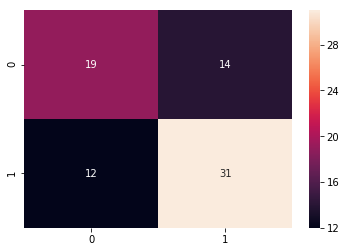

NameError: name 'tree' is not defined

<Figure size 7200x6480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
%matplotlib inline

dataset = pd.read_csv('heart.csv')
print("Welcome!")
while True:
    print("What do you want to do? \n1-Accuracy & Prediction\n2-Data Visualization Diagrams\n3-Exit");
    func=int(input());
    if(func==1):
        print("Please select the algorithm you'd want to implement.")
        print("1-Regression\t2-Decision Tree \t3-Naive Bayes \t4-KNN \t5-Neural Network \t6-K-Means Clustering");
        choice=int(input());
        if(choice==1):
            print("----- Regression -----");
            inputa='age'
            inputname='ST Depression'
            x=dataset[inputa].values.reshape(-1,1)
            y=dataset['target'].values.reshape(-1,1)
            XTrain, XTest, YTrain, YTest = train_test_split(x,y,test_size=0.25,random_state=20)
            regressor = LinearRegression()
            regressor.fit(XTrain, YTrain)
        elif(choice==2):
            print("----- Decision Tree -----")
            dataset=dataset.fillna(0)
            feature_cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exan','oldpeak','slope','ca','thal']
            X = dataset.iloc[:, [0, 12]].values  # [Independent Variables]
            Y = dataset.target #  [Dependent Varible]

            # Splitting the dataset into the Training set and Test set
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

            # Fitting Decision Tree Classification to the Training set
            classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
            classifier.fit(X_train, y_train)

            # Predicting the Test set results
            y_pred = classifier.predict(X_test)
            print(y_pred)

            #Accuracy
            print("Accuracy of decision tree classifier: ",metrics.accuracy_score(y_test,y_pred)*100,"%")

            # Making the Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            print("The confusion matrix for decision tree is: ")
            seabornInstance.heatmap(cm,annot=True)

            #Plotting the decision tree
            plt.show()
            classes_name=[str(i) for i in dataset.target]
            fig=plt.figure(figsize=(100,90))
            _ = tree.plot_tree(classifier,
                               feature_names=feature_cols, rounded=True,
                               class_names=classes_name, filled=True)
            plt.savefig("DTree_heart.png")
        elif(choice==3):
            print("----- Naive Bayes -----");
            
        elif(choice==4):
            print("----- KNN -----");
            
        elif(choice==5):
            print("----- Neural network -----");
            
        elif(choice==6):
            print("----- K-Means ----- ");
            x=dataset.iloc[:, [0, 4]].values  #Age, cholestrol
            wcss = [] # sum of squares of the distances of each data point in all clusters to their respective centroids
            for i in range (1,11):
                kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
                kmeans.fit(x)
                wcss.append(kmeans.inertia_)
            plt.plot(range(1,11), wcss)
            plt.title('The Elbow Method')
            plt.xlabel('Number of clusters')
            plt.ylabel('WCSS')
            plt.show()
            plt.savefig("Elbow.png")
            kmeans = KMeans(n_clusters = 4 , init = 'k-means++', random_state= 42)
            y_kmeans= kmeans.fit_predict(x)
            plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s= 100, c= 'purple', label= 'C1' )
            plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s= 100, c= 'blue', label= 'C2')
            plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s= 100, c= 'orange', label= 'C3')
            plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s= 100, c= 'red', label= 'C4')
            plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'yellow', label= 'Centroids')
            plt.title('Clusters')
            plt.xlabel('Age')
            plt.ylabel('Cholestrol')
            plt.legend()
            plt.show()
            plt.savefig("KMeans_heart.png")
           
        else:
            print("Invalid option provided for algorithm selection");
    elif(func==2):
        print("Please select the diagram you want to create.")
        print("1-Graph b/w two variables")
        print("2-Bar Graph")
        print("3-Boxplot ")
        print("4-Correlation Matrix")
        print("5- KDE plot")
        print("5- Count plot")
        ans=int(input());
        if(ans==1):
            print("----- Line graph -----")
        elif(ans==2):
            print("----- Bar graph -----");           
        elif(ans==3):
            print("----- Boxplot -----");
        elif(ans==4):
            print("----- Correlation Matrix -----")
            plt.style.use("ggplot")
            plt.figure(figsize=(13,10))
            seabornInstance.heatmap(dataset.corr(),annot=True,fmt=".0%",cmap="viridis")
            plt.title("Correlation Matrix",fontsize=20)
            plt.savefig("CorrelationMatrix.png")
            plt.show()
        elif(ans==5):
            print("----- KDE Plot -----")
            print("Which variable you want to see? \n (age,chol,thalach,oldpeak) ")
            col=input(">> ")
            plt.figure(figsize=(8,6))
            seabornInstance.kdeplot(dataset.loc[dataset["target"]==1][col],color="green",shade=True)
            seabornInstance.kdeplot(dataset.loc[dataset["target"]==0][col],color="red",shade=True)
            plt.legend(["target:1","target:0"])
            plt.title(col.upper())
            plt.savefig("KDE_"+col+".png")
        elif(ans==6):
            print("----- Count Plot -----")
            plt.figure( figsize = (15,8) )
            col=input("Which variable? (age, sex, fbs,thalach,restecg) ")
            seabornInstance.countplot( data = dataset , x = col , hue = 'target' ,palette='Set2')
            plt.savefig("CountPlot_"+col+".png")
    else:
        break;